**Include the Libraries which are needed for the Prediction Model**

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

**Mount The Required Dataset**

In [186]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [187]:
gold_data = pd.read_csv(
    '/content/drive/MyDrive/ML_PROJECTS/Gold_Price_Prediction/gld_price_data.csv'
)


**Data Preprocessing**

In [188]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [189]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [190]:
gold_data.shape

(2290, 6)

In [191]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [192]:
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [193]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


**CORRELATION**:--

* Positive Correlation
* Negative Correlation



In [194]:
gold_data['Date'] = pd.to_datetime(gold_data['Date'])
correlation = gold_data.corr(numeric_only=True)

<Axes: >

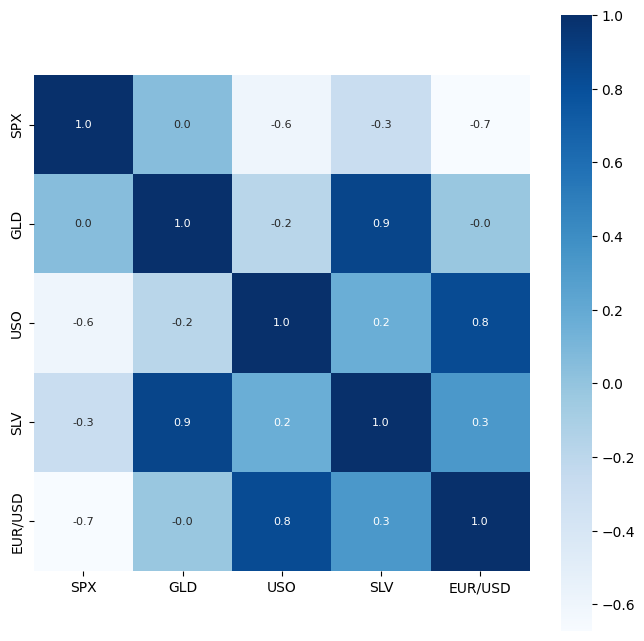

In [195]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

**Correlated Values**

In [196]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/tmp/ipython-input-4249945070.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color='b')


<Axes: xlabel='GLD', ylabel='Density'>

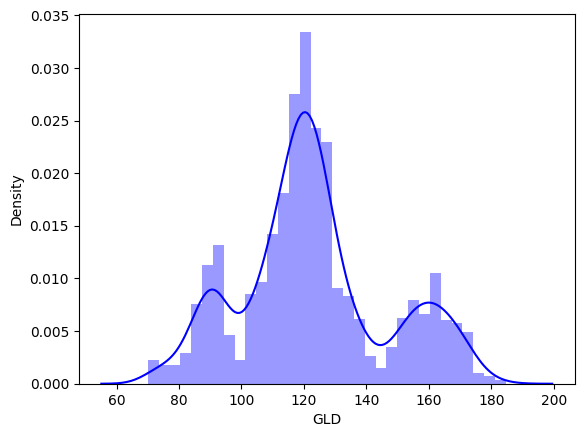

In [197]:
sns.distplot(gold_data['GLD'], color='b')

**Split the Test and Train Data**

In [198]:
x = gold_data.drop(['Date','GLD'],axis=1)
y = gold_data['GLD']

In [199]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [200]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [201]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=2)

**Model Training using Random Forest Regressor**

In [202]:
regressor = RandomForestRegressor(n_estimators=100)

In [203]:
regressor.fit(x_train, y_train)

RandomForestRegressor()

In [204]:
predicted_values = regressor.predict(x_test)

In [205]:
print(predicted_values)

[168.60709921  81.9543999  116.10059999 127.56000065 120.84240087
 154.75199752 150.00979839 125.99300039 117.33539905 125.85110083
 116.76020101 172.02930101 141.68629871 167.84829887 115.15599987
 117.2762005  136.9934024  170.02400004 159.62760306 157.00499928
 155.24090003 125.10530012 176.21959909 157.26460301 125.17000005
  93.90449991  77.78960031 120.55580008 119.03769951 167.47489963
  88.26230026 125.16580018  91.20100098 117.63040067 121.09999904
 136.62840157 115.5976011  114.79300102 147.70169935 107.26140097
 104.45730243  87.14589795 126.55500038 118.00489995 153.0094989
 119.82909993 108.38110007 108.15909859  93.19560022 127.11619752
  74.78800031 113.65009937 121.69720006 111.11899881 118.77859894
 120.97169937 159.11210028 167.05110108 147.27739684  86.21099876
  94.45230032  86.79449911  90.78529989 119.07920082 126.38370063
 127.47919964 169.65290027 122.28319923 117.47429881  98.68629987
 168.8115024  142.77689814 132.58340233 121.25770232 121.4996993
 119.6082004

In [206]:
error_score = metrics.r2_score(y_test, predicted_values)
print('Error score is: ',error_score)

Error score is:  0.9890198406910419


**Compare using a Plot**

In [207]:
y_test = list(y_test)

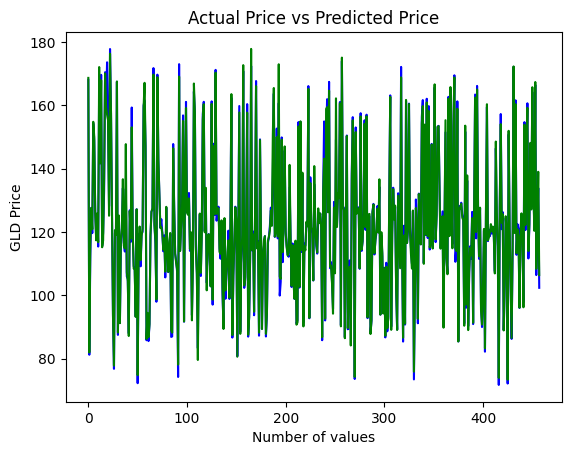

In [208]:
plt.plot(y_test, color='b', label='Actual Value')
plt.plot(predicted_values, color='g', label='Predicted Values')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
#plt.legend()
plt.show()

In [209]:
!mkdir Gold-Price-Prediction

In [210]:
cd Gold-Price-Prediction/

/content/Gold-Price-Prediction/Gold-Price-Prediction


In [211]:
mkdir notebook

In [212]:
cd ..

/content/Gold-Price-Prediction


In [213]:
!mv /content/Gold_price_Prediction.ipynb /content/Gold-Price-Prediction/notebook

mv: cannot stat '/content/Gold_price_Prediction.ipynb': No such file or directory


In [214]:
!ls /content/Gold-Price-Prediction/notebook


Gold_price_Prediction.ipynb


In [215]:
cd /content/Gold-Price-Prediction/

/content/Gold-Price-Prediction


In [216]:
!git init

Reinitialized existing Git repository in /content/Gold-Price-Prediction/.git/


In [217]:
# This is fully Python, safe, no shell commands
gitignore_content = """__pycache__/
*.pyc
.ipynb_checkpoints/
data/
.env
"""

with open(".gitignore", "w") as f:
    f.write(gitignore_content)
